In [189]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.ensemble import RandomForestRegressor

In [190]:
dados1=pd.read_csv('wine_quality.csv')

In [191]:
def limpeza(x):
    for y in range(len(x)-1):
        i=0
        seguidos=0
        for z in x.columns:
            if x[z][y+1]==x[z][y-seguidos]:
                i+=1
        if i==len(x.columns):
            x.drop(index=y,inplace=True)
            seguidos+=1
        else:
            seguidos=0

In [192]:
limpeza(dados1)

In [193]:
dados1.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [230]:
dados=dados1[0:round((len(dados1))*.75)]
dadost=dados1[round((len(dados1))*.75):]
dadost1=dadost.copy()

In [195]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,8.612909,0.520234,0.292414,2.558709,0.089513,15.341291,47.309461,0.997052,3.298267,0.667542,10.379399,5.656941
std,1.764044,0.179039,0.195915,1.245838,0.049275,10.256458,34.274990,0.001862,0.155447,0.178764,1.094455,0.812999
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,22.000000,0.996000,3.200000,0.560000,9.500000,5.000000
50%,8.300000,0.500000,0.280000,2.200000,0.080000,13.000000,38.000000,0.997000,3.300000,0.620000,10.000000,6.000000
75%,9.600000,0.630000,0.450000,2.700000,0.092000,21.000000,63.000000,0.998150,3.390000,0.740000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


In [196]:
l1=['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

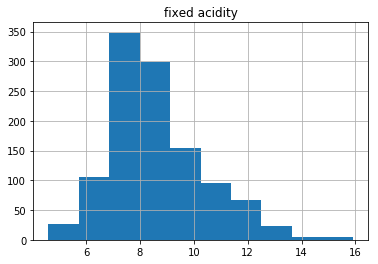

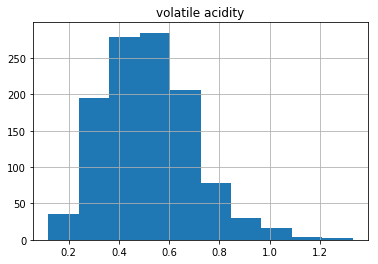

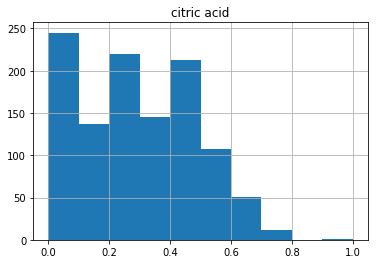

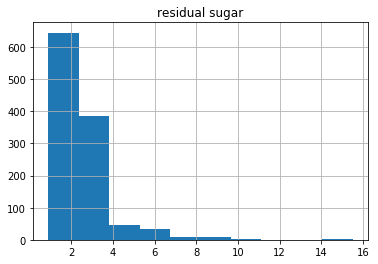

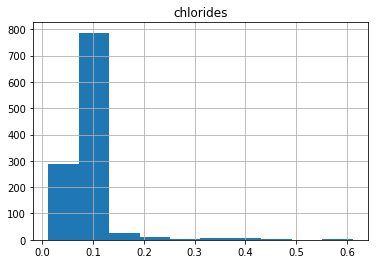

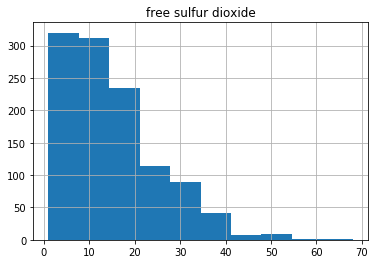

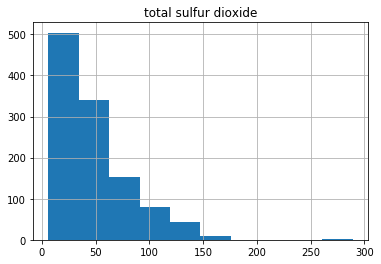

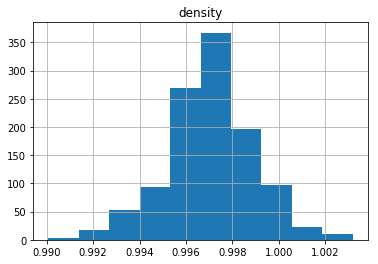

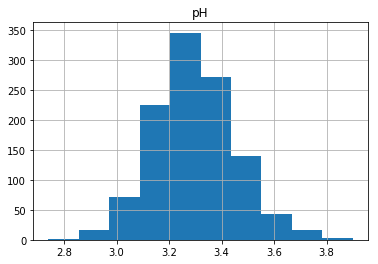

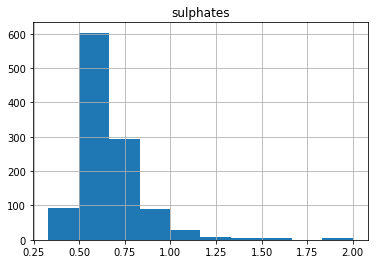

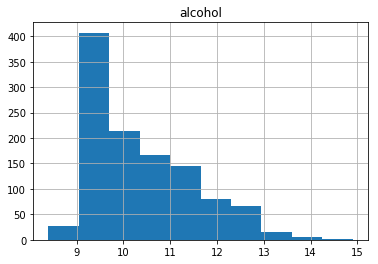

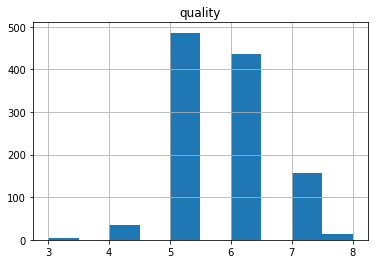

In [197]:
for x in dados.columns:
    dados.hist(column=x)

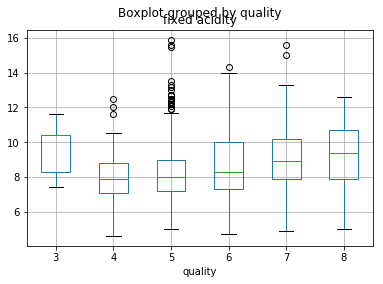

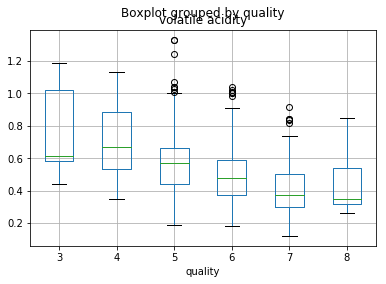

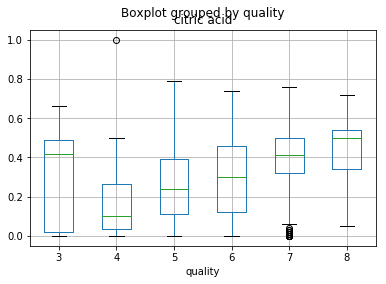

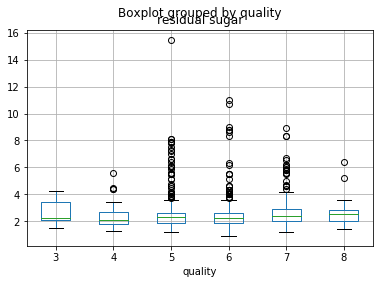

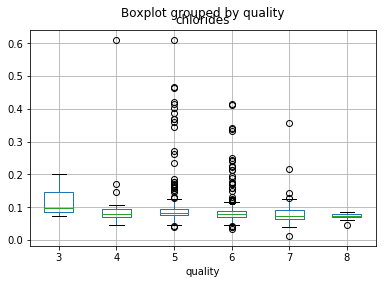

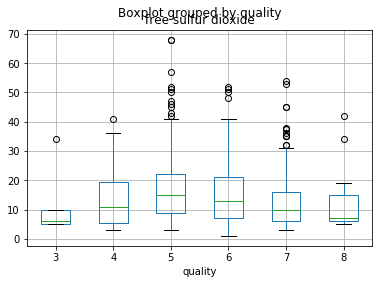

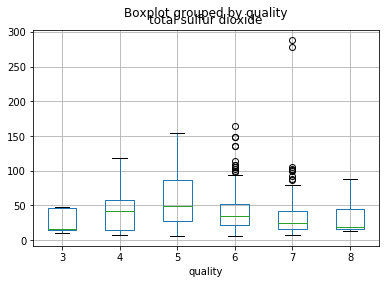

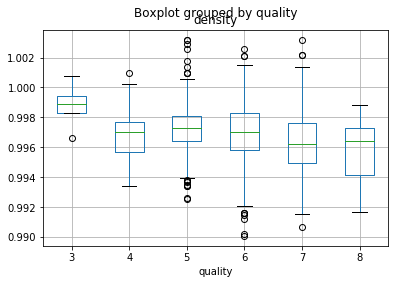

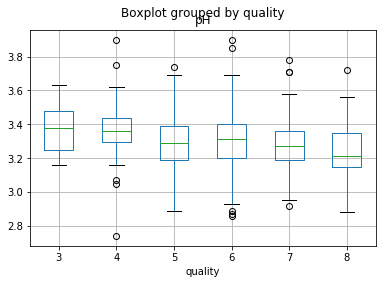

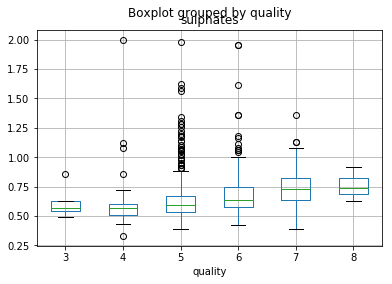

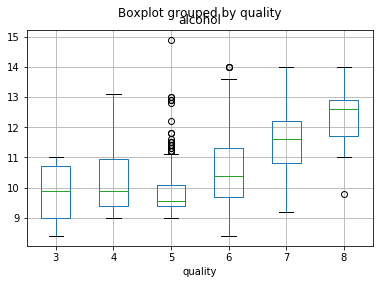

In [198]:
for x in l1:
    dados.boxplot(column=x,by='quality');#subplots

In [199]:
np.sum(dados.isnull())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [200]:
teste=dados.corr()

In [201]:
n = teste.shape[0]
teste.iloc[range(n),range(n)]= float('NaN')

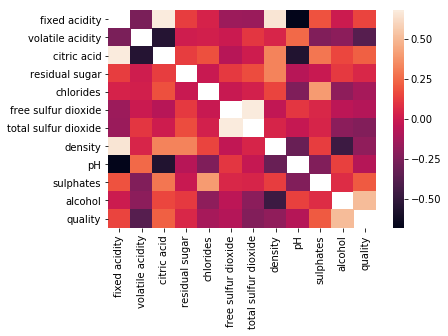

In [202]:
heatmap(teste);

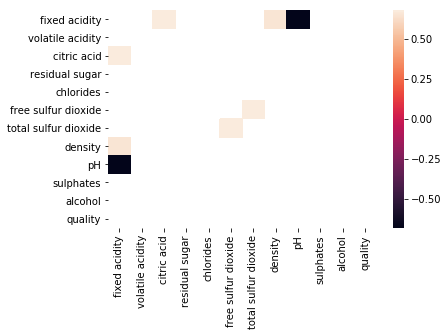

In [203]:
teste1=teste[(teste.abs()>0.6)&(teste<1)]
heatmap(teste1);

In [204]:
def regressao(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [205]:
X=dados[l1]
Y=dados['quality']
results=regressao(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     62.28
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          5.19e-108
Time:                        17:43:21   Log-Likelihood:                -1100.1
No. Observations:                1131   AIC:                             2224.
Df Residuals:                    1119   BIC:                             2285.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   30.6961     24.978      1.229      0.219     -18.313      79.705
fixed acidity            0.0373      0.031      1.186      0.236      -0.024       0.099
volatile acidity        -1.0751      0.142     -7.586      0.000      -1.353      -0.797
citric acid             -0.2563      0.176     -1.460      0.145      -0.601       0.088
residual sugar           0.0305      0.020      1.552      0.121      -0.008       0.069
chlorides               -1.6247      0.479     -3.391      0.001      -2.565      -0.685
free sulfur dioxide      0.0031      0.003      1.158      0.247      -0.002       0.008
total sulfur dioxide    -0.0036      0.001     -4.148      0.000      -0.005      -0.002
density                -27.1349     25.503     -1.064      0.288     -77.175      22.905
pH                      -0.2865      0.226     -1.267      0.205      -0.730       0.157
sulphates                0.7435      0.127      5.857      0.000       0.494       0.993
alcohol                  0.2859      0.030      9.411      0.000       0.226       0.345
==============================================================================
Omnibus:                       21.451   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.210
Skew:                          -0.177   Prob(JB):                     1.01e-07
Kurtosis:                       3.748   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
l1.remove('density')
X=dados[l1]
results=regressao(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     68.39
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          1.07e-108
Time:                        17:43:21   Log-Likelihood:                -1100.7
No. Observations:                1131   AIC:                             2223.
Df Residuals:                    1120   BIC:                             2279.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1316      0.734      5.627      0.000       2.691       5.572
fixed acidity            0.0109      0.019      0.564      0.573      -0.027       0.049
volatile acidity        -1.0968      0.140     -7.819      0.000      -1.372      -0.822
citric acid             -0.2500      0.175     -1.425      0.154      -0.594       0.094
residual sugar           0.0185      0.016      1.149      0.251      -0.013       0.050
chlorides               -1.7099      0.472     -3.620      0.000      -2.637      -0.783
free sulfur dioxide      0.0033      0.003      1.239      0.216      -0.002       0.009
total sulfur dioxide    -0.0037      0.001     -4.245      0.000      -0.005      -0.002
pH                      -0.4228      0.186     -2.270      0.023      -0.788      -0.057
sulphates                0.7165      0.124      5.760      0.000       0.472       0.961
alcohol                  0.3102      0.020     15.507      0.000       0.271       0.349
==============================================================================
Omnibus:                       19.214   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.416
Skew:                          -0.160   Prob(JB):                     6.75e-07
Kurtosis:                       3.707   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ao comparar as correlacoes nao jugamos necessario retirada de duas variaveis quaisquer pelo criterio de correlacao muito alta entre as mesmas, na base a ser utilizada , o mesmo nao ocorre


In [207]:
l1.remove('fixed acidity')
X=dados[l1]
results=regressao(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     76.00
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          1.39e-109
Time:                        17:43:21   Log-Likelihood:                -1100.8
No. Observations:                1131   AIC:                             2222.
Df Residuals:                    1121   BIC:                             2272.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4034      0.554      7.951      0.000       3.317       5.490
volatile acidity        -1.0755      0.135     -7.962      0.000      -1.341      -0.810
citric acid             -0.1938      0.144     -1.342      0.180      -0.477       0.090
residual sugar           0.0197      0.016      1.228      0.220      -0.012       0.051
chlorides               -1.7931      0.449     -3.997      0.000      -2.673      -0.913
free sulfur dioxide      0.0035      0.003      1.339      0.181      -0.002       0.009
total sulfur dioxide    -0.0038      0.001     -4.739      0.000      -0.005      -0.002
pH                      -0.4783      0.158     -3.025      0.003      -0.789      -0.168
sulphates                0.7228      0.124      5.837      0.000       0.480       0.966
alcohol                  0.3085      0.020     15.601      0.000       0.270       0.347
==============================================================================
Omnibus:                       17.952   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.096
Skew:                          -0.154   Prob(JB):                     2.15e-06
Kurtosis:                       3.677   Cond. No.                     1.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
l1.remove('residual sugar')
X=dados[l1]
results=regressao(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     85.27
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          3.07e-110
Time:                        17:43:21   Log-Likelihood:                -1101.6
No. Observations:                1131   AIC:                             2221.
Df Residuals:                    1122   BIC:                             2266.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4226      0.554      7.987      0.000       3.336       5.509
volatile acidity        -1.0608      0.135     -7.882      0.000      -1.325      -0.797
citric acid             -0.1741      0.144     -1.212      0.226      -0.456       0.108
chlorides               -1.7934      0.449     -3.997      0.000      -2.674      -0.913
free sulfur dioxide      0.0036      0.003      1.356      0.175      -0.002       0.009
total sulfur dioxide    -0.0037      0.001     -4.616      0.000      -0.005      -0.002
pH                      -0.4849      0.158     -3.068      0.002      -0.795      -0.175
sulphates                0.7143      0.124      5.776      0.000       0.472       0.957
alcohol                  0.3122      0.020     15.969      0.000       0.274       0.351
==============================================================================
Omnibus:                       16.728   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.154
Skew:                          -0.143   Prob(JB):                     5.69e-06
Kurtosis:                       3.656   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
l1.remove('citric acid')
X=dados[l1]
results=regressao(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     97.20
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          6.22e-111
Time:                        17:43:21   Log-Likelihood:                -1102.3
No. Observations:                1131   AIC:                             2221.
Df Residuals:                    1123   BIC:                             2261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0825      0.478      8.549      0.000       3.146       5.019
volatile acidity        -0.9822      0.118     -8.326      0.000      -1.214      -0.751
chlorides               -1.8630      0.445     -4.185      0.000      -2.736      -0.990
free sulfur dioxide      0.0039      0.003      1.504      0.133      -0.001       0.009
total sulfur dioxide    -0.0038      0.001     -4.851      0.000      -0.005      -0.002
pH                      -0.3890      0.137     -2.842      0.005      -0.657      -0.120
sulphates                0.7078      0.124      5.727      0.000       0.465       0.950
alcohol                  0.3068      0.019     16.116      0.000       0.269       0.344
==============================================================================
Omnibus:                       17.943   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.070
Skew:                          -0.154   Prob(JB):                     2.18e-06
Kurtosis:                       3.677   Cond. No.                     1.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
#predict#random-forest
def qualidade(x):
    x.reset_index()
    if 'index' in x.columns:
        x.drop(columns=['index'])
    x['qualiteste']=4.0825-.9822*x['volatile acidity']\
                    -1.8630*x['chlorides']\
                    +0.0039*x['free sulfur dioxide']\
                    -0.0038*x['total sulfur dioxide']\
                    -0.3890*x['pH']\
                    +0.7078*x['sulphates']\
                    +0.3068*x['alcohol']


In [211]:
qualidade(dadost)

C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [212]:
dadost['qualiround']=round(dadost['qualiteste'])

C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [213]:
dadost.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualiteste,qualiround
1192,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7,6.607961,7.0
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5,5.171373,5.0
1194,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6,5.033301,5.0
1195,6.2,0.430,0.22,1.8,0.078,21.0,56.0,0.99633,3.52,0.60,9.5,6,5.353940,5.0
1196,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,5.180170,5.0
1197,7.7,0.570,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6,5.535111,6.0
1198,7.7,0.260,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,6,6.189684,6.0
1199,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,5.180170,5.0
1200,7.7,0.570,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6,5.535111,6.0
1201,7.9,0.340,0.36,1.9,0.065,5.0,10.0,0.99419,3.27,0.54,11.2,7,6.155299,6.0


In [214]:
dadost.reset_index(inplace=True)

In [215]:
dadost['acertos']=0
for x in range(len(dadost)):
    if dadost['quality'][x]==dadost['qualiround'][x]:
        dadost['acertos'][x]='ta certo'
    else:
        dadost['acertos'][x]='ta serto'

C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.p

In [245]:
dadost['+-1']=0
for x in range(len(dadost)):
    if dadost['quality'][x]==dadost['qualiround'][x]or dadost['quality'][x]==dadost['qualiround'][x]+1 or dadost['quality'][x]==dadost['qualiround'][x]-1:
        dadost['+-1'][x]='ta certo'
    else:
        dadost['+-1'][x]='ta serto'

C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


KeyError: 0

In [217]:
dadost.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualiteste,qualiround,acertos,+-1
0,1192,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7,6.607961,7.0,ta certo,ta certo
1,1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5,5.171373,5.0,ta certo,ta certo
2,1194,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6,5.033301,5.0,ta serto,ta certo
3,1195,6.2,0.430,0.22,1.8,0.078,21.0,56.0,0.99633,3.52,0.60,9.5,6,5.353940,5.0,ta serto,ta certo
4,1196,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,5.180170,5.0,ta serto,ta certo


In [218]:
dadost['acertos'].value_counts()

ta certo    235
ta serto    142
Name: acertos, dtype: int64

In [219]:
dadost['+-1'].value_counts()

ta certo    359
ta serto     18
Name: +-1, dtype: int64

In [288]:
precisão_rlm=235/(142+235)
print('precisão regressão linear múltipla:',round(float(precisão_rlm*100),2),'%')

precisão regressão linear múltipla: 62.33 %


In [292]:
tolerância_de_1_estrela=359/(359+18)
print('Com tolerância aumentada para +-1 estrela :',round(float(tolerância_de_1_estrela*100),2),'%')

Com tolerância aumentada para +-1 estrela : 95.23 %


In [222]:
dadost['certeza']=0
for x in range(len(dadost)):
    if abs(dadost['qualiround'][x]-dadost['qualiteste'][x])>(2*.5/3)  :
        dadost['certeza'][x]='baixa'
    elif abs(dadost['qualiround'][x]-dadost['qualiteste'][x])>(.5/3):
        dadost['certeza'][x]='média'
    else: 
        dadost['certeza'][x]='alta'

C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydat

In [223]:
dadost.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualiteste,qualiround,acertos,+-1,certeza
0,1192,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7,6.607961,7.0,ta certo,ta certo,baixa
1,1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5,5.171373,5.0,ta certo,ta certo,média
2,1194,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6,5.033301,5.0,ta serto,ta certo,alta
3,1195,6.2,0.430,0.22,1.8,0.078,21.0,56.0,0.99633,3.52,0.60,9.5,6,5.353940,5.0,ta serto,ta certo,baixa
4,1196,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,5.180170,5.0,ta serto,ta certo,média


In [224]:
baixa=dadost.loc[dadost['certeza']=='baixa']
media=dadost.loc[dadost['certeza']=='média']
alta=dadost.loc[dadost['certeza']=='alta']

In [225]:
baixa['acertos'].value_counts()

ta certo    78
ta serto    50
Name: acertos, dtype: int64

In [226]:
media['acertos'].value_counts()

ta certo    81
ta serto    48
Name: acertos, dtype: int64

In [227]:
alta['acertos'].value_counts()

ta certo    76
ta serto    44
Name: acertos, dtype: int64

In [232]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [235]:
pred= rf.predict(dadost1[l1])

In [236]:
errors= abs(pred - dadost1['quality'])

In [238]:
 print('desvio padrão:',round(np.mean(errors),2))

desvio padrão: 0.51


In [281]:
mape = 100 * (errors / dadost1['quality'])
accuracy = 100 - np.mean(mape)
print(accuracy)

nan


In [246]:
dadost1['qualiteste']=0

In [259]:
dadost1=dadost1.assign(qualiteste=pred)

In [260]:
dadost1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualiteste,acertos,qualiround
1192,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7,6.797,0,0
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5,4.823,0,0
1194,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6,5.030,0,0
1195,6.2,0.430,0.22,1.8,0.078,21.0,56.0,0.99633,3.52,0.60,9.5,6,5.292,0,0
1196,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,5.056,0,0


In [272]:
dadost1=dadost1.assign(qualiround=round(dadost1['qualiteste']))

In [269]:
dadost1.reset_index(inplace=True)

In [273]:
dadost1['acertos']=0
for x in range(len(dadost1)):
    if dadost1['quality'][x]== dadost1['qualiround'][x]:
        dadost1['acertos'][x]='ta certo'
    else:
        dadost1['acertos'][x]='ta serto'


C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [278]:
dadost1['+-1']=0
for x in range(len(dadost)):
    if dadost1['quality'][x]==dadost1['qualiround'][x]or dadost1['quality'][x]==dadost1['qualiround'][x]+1 or dadost1['quality'][x]==dadost1['qualiround'][x]-1:
        dadost1['+-1'][x]='ta certo'
    else:
        dadost1['+-1'][x]='ta serto'

C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rbuto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [274]:
dadost1['acertos'].value_counts()

ta certo    220
ta serto    157
Name: acertos, dtype: int64

In [287]:
precisão_rf=220/(220+157)
print('precisão random forest:',round(float(precisão_rf*100),2),'%')

precisão random forest: 58.36 %
